In [1]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import datetime
import pyflux as pf
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

In [2]:
a = DataReader('F', 'yahoo', datetime(2006, 6, 1), datetime(2016, 6, 1))
print(np.diff(np.log(a['Adj Close'].values)))
a_returns = pd.DataFrame(np.diff(np.log(a['Adj Close'].values)))

[ 0.00972904 -0.01814434 -0.02135315 ... -0.00074327  0.00296951
 -0.02857345]


In [3]:
a_returns.index = a.index.values[1: a.index.values.shape[0]]
a_returns.columns = ["F Returns"]

a_returns.head()

,F Returns
2006-06-01,0.009729
2006-06-02,-0.018144
2006-06-05,-0.021353
2006-06-06,-0.007220
2006-06-07,-0.016070


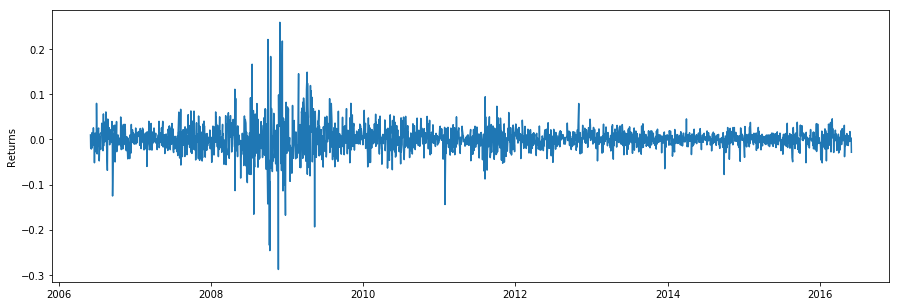

In [4]:
plt.figure(figsize=(15, 5))
plt.ylabel('Returns')
plt.plot(a_returns)
plt.show()

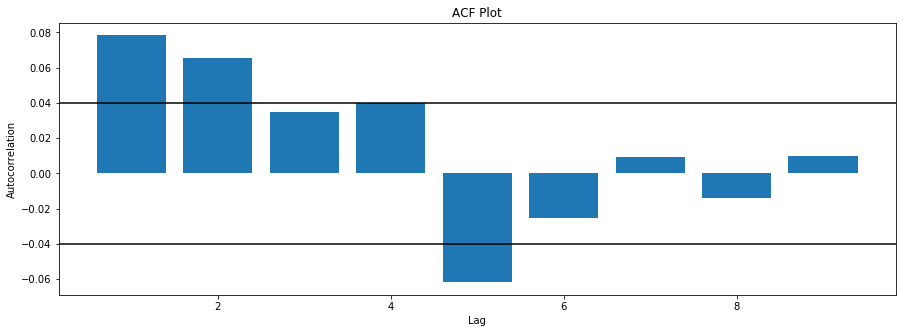

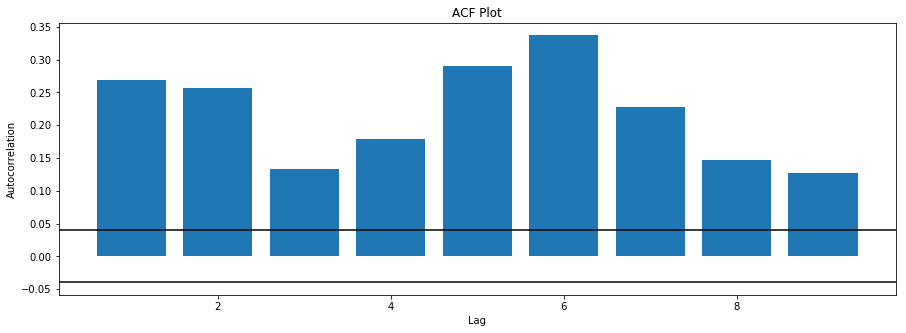

In [5]:
pf.acf_plot(a_returns.values.T[0])
pf.acf_plot(np.square(a_returns.values.T[0]))

# Propose Model

In [6]:
my_model = pf.GARCH(p=1, q=1, data=a_returns)
print(my_model.latent_variables)

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Vol Constant              Normal          mu0: 0, sigma0: 3         Normal     exp       
1        q(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
2        p(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
3        Returns Constant          Normal          mu0: 0, sigma0: 3         Normal     None      


# Perform Inference

Acceptance rate of Metropolis-Hastings is 0.004425
Acceptance rate of Metropolis-Hastings is 0.30715

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.30515


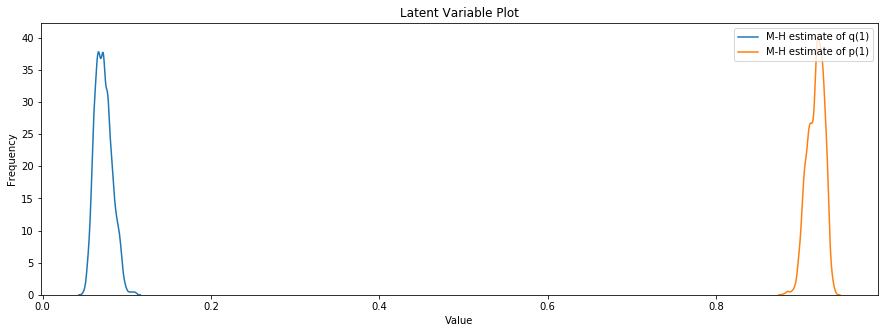

In [7]:
resutl = my_model.fit('M-H', nsims=20000)

my_model.plot_z([1, 2])

# Evaluate Model fit

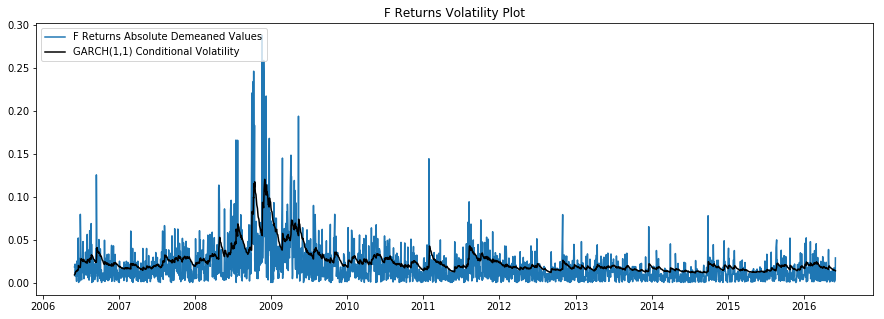

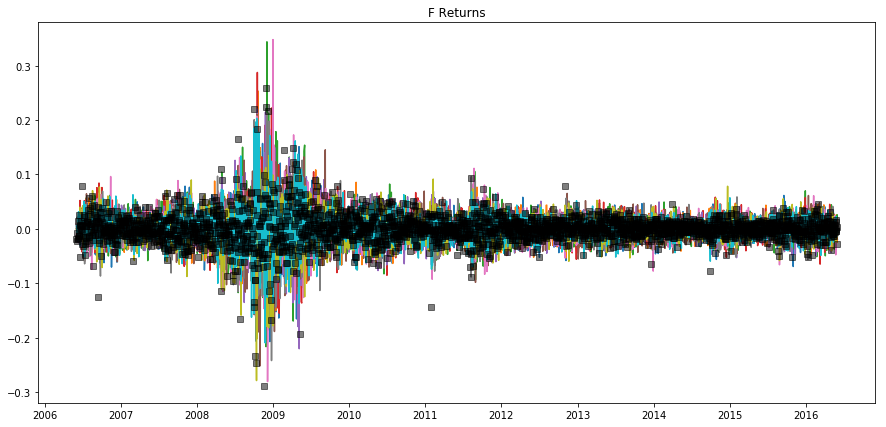

In [8]:
my_model.plot_fit(figsize=(15, 5))
my_model.plot_sample(nsims=10, figsize=(15, 7))

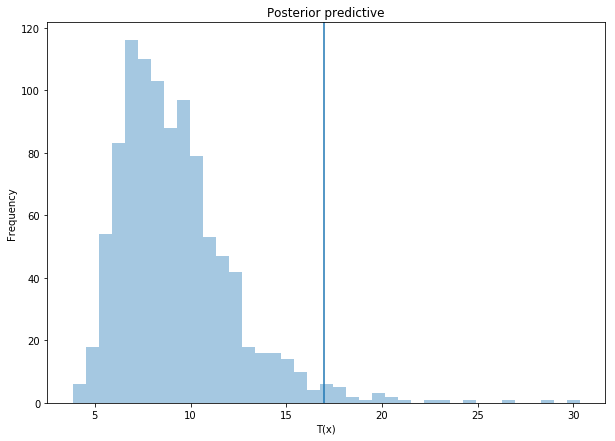

In [9]:
my_model.plot_ppc(T=kurtosis)

# Analyze and Predict

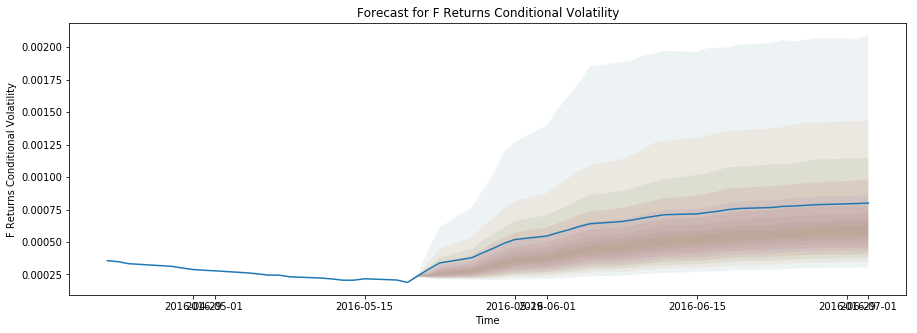

In [10]:
my_model.plot_predict(h=30, figsize=(15, 5))